## Capstone

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', 70)
import seaborn as sns
sns.set()  #  Will import Seaborn functionalities
# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings('ignore')

#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

In [3]:
memberanalysis= pd.read_csv('member_sample.csv')

In [4]:
memberanalysis.head()

,Unnamed: 0,Individual Key,Household Key,Member Flag,City,State - Grouped,ZIP5,ZIP9,FSV CMSI Flag,FSV Credit Card Flag,FSV Deposit Program Flag,FSV Home Equity Flag,FSV ID Theft Flag,FSV Mortgage Flag,INS Client Flag,TRV Globalware Flag,Number of Children,Responded to Catalog,Race,Length Of Residence,Mail Responder,Home Owner,Income,Date Of Birth,Children,Education,Dwelling Type,Credit Ranges,Language,Gender,Active Expiration Date,Address Change Date,Bad Address Flag,Billing Code Description,Birth Date MMDDYYYY,Branch Name,Cancel Date,Cancel Reason,County,Do Not Direct Mail Solicit,Email Available,Email Status,ERS ENT Count Year 1,ERS ENT Count Year 2,ERS ENT Count Year 3,ERS Member Cost Year 1,ERS Member Cost Year 2,ERS Member Cost Year 3,Right_Gender,Right_Individual Key,Join AAA Date,Join Club Date,Member Key,Member Map Location,Member Number Associate ID,Member Phone Type,Member Status,Member Tenure Years,Member Type,Membership ID,Months from Join to Cancel,Opt-Out - Publication,Reason Joined,Reinstate Date,Renew Method,ZIP,Mosaic Household,Mosaic Global Household,kcl_B_IND_MosaicsGrouping,New Mover Flag,Occupation Code,Occupation Group,Right_Dwelling Type,Move Distance,Occupant Type,Breakdown Map Location,Breakdown City,Breakdown State,Basic Cost,Calculated Tow Miles,Call Canceled,Call Killed,Call Status Recv Date,Cash Call,Clearing Code Last Description,Dispatch Code1 Description,Dispatch Code2Description,DTL Prob1 Code Description,Fleet Indicator,Is Duplicate,Is NSR,Member Match Flag,Member Number and Associate ID,Motorcycle Indicator,Plus Cost,Plus Indicator Description,Premier Cost,Prob1 Code Description,Prob2 Code Description,SC Call Club Code Description,SC Date,Rec ID,SC STS RSN Code Description,SC Vehicle Manufacturer Name,SC Vehicle Model Name,SVC Facility Name,SVC Facility Type,Total Cost,Tow Destination Latitude,Tow Destination Longitude,Tow Destination Name,Was Duplicated,Was Towed To AAR Referral
0,0,10000003.0,10462590.0,Y,NEW HAVEN,CT,6511.0,65111349.0,N,N,N,N,N,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Small or large multi-family w/apt number,NaN,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,52211550.0,4500791.0,Y,WEST WARWICK,RI,2893.0,28933850.0,N,Y,N,N,N,N,N,N,One Child,NaN,Caucasion / White - English,15.0,Yes,Home Owner,"30-39,999",1922-02-05 00:00:00,Yes,Some College,Small or large multi-family w/apt number,600-649,English,NaN,2020-09-01 00:00:00,2005-01-28 12:41:09,F,New Member,1922-02-05 00:00:00,RI - WARWICK BRANCH,NaN,NaN,KENT,0.0,0.0,NaN,0.0,0.0,2.0,0.0,0.0,65.0,NaN,52211550.0,1970-09-01 00:00:00,1970-09-01 00:00:00,1500014.0,"{41.696,-71.5308}",15300.0,VoIP,ACTIVE,49.0,Primary,153.0,NaN,Opt-In,NaN,2019-08-23 00:00:00,AUTO RENEW,2893.0,Senior Discounts,Low Income Elders,Golden Year Guardians,N,NaN,NaN,NaN,NaN,NaN,"{41,-71}",West Warwick,RI,32.5,0.8,N,N,2017-04-13 10:05:17,Y,CASH CALL ONLY C,Engine Overheat,NaN,Engine Overheat,N,0.0,0.0,1.0,15300.0,N,0.0,Basic Membership,0.0,Tow,NaN,AAA Northeast,2017-04-13 00:00:00,9707320.0,CASH CALL ONLY C,TOYOTA,CAMRY,ASTRO WRECKER SERVICE,independent repair,32.5,41.0,-71.0,Aar / Johnson's Auto Service,0.0,1.0
2,2,52211550.0,4500791.0,Y,WEST WARWICK,RI,2893.0,28933850.0,N,Y,N,N,N,N,N,N,One Child,NaN,Caucasion / White - English,15.0,Yes,Home Owner,"30-39,999",1922-02-05 00:00:00,Yes,Some College,Small or large multi-family w/apt number,600-649,English,NaN,2020-09-01 00:00:00,2005-01-28 12:41:09,F,New Member,1922-02-05 00:00:00,RI - WARWICK BRANCH,NaN,NaN,KENT,0.0,0.0,NaN,0.0,0.0,2.0,0.0,0.0,65.0,NaN,52211550.0,1970-09-01 00:00:00,1970-09-01 00:00:00,1500014.0,"{41.696,-71.5308}",15300.0,VoIP,ACTIVE,49.0,Primary,153.0,NaN,Opt-In,NaN,2019-08-23 00:00:00,AUTO RENEW,2

In [5]:
memberanalysis = memberanalysis.drop('Unnamed: 0', axis = 1)

<AxesSubplot:>

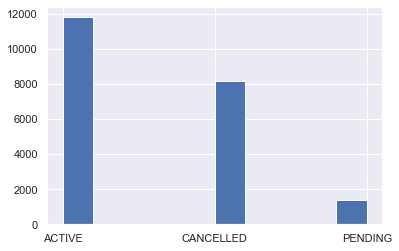

In [6]:
memberanalysis['Member Status'].hist()

In [7]:
memberanalysis['Member Status'].value_counts()

ACTIVE       11808
CANCELLED    8177 
PENDING      1358 
Name: Member Status, dtype: int64

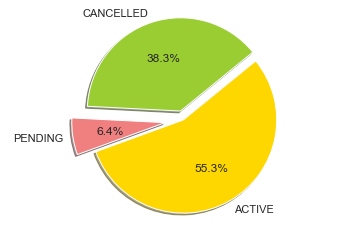

In [8]:
import matplotlib.pyplot as plt

# Data to plot
labels = 'ACTIVE', 'CANCELLED', 'PENDING', 
sizes = [11808,8177,1358]
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0, 0.1, 0.2)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=200)

plt.axis('equal')
plt.show()

In [9]:
# # Option to remove cancelled members
# memberanalysis = memberanalysis[(memberanalysis['Member Status']== 'Active')]
# memberanalysis

In [10]:
# # Option to remove all cancelled reoadside events
# memberanalysis = memberanalysis[(memberanalysis['Call Canceled']== 'N')]

In [11]:
# memberanalysis['Call Canceled'].hist()

## Column names

In [12]:
# Stripping out spaces from ends of names, and replacing internal spaces with "_"
print("\nStripping spaces from ends of column names; replacing internal spaces with '_'\n")
memberanalysis.columns = [col.strip().replace('-', '_').lower() for col in memberanalysis.columns]
memberanalysis.columns = [col.strip().replace(' ', '_').lower() for col in memberanalysis.columns]

# Print edited column names
print("\nNew Column Names:\n", memberanalysis.columns)


Stripping spaces from ends of column names; replacing internal spaces with '_'


New Column Names:
 Index(['individual_key', 'household_key', 'member_flag', 'city',
       'state___grouped', 'zip5', 'zip9', 'fsv_cmsi_flag',
       'fsv_credit_card_flag', 'fsv_deposit_program_flag',
       ...
       'sc_vehicle_manufacturer_name', 'sc_vehicle_model_name',
       'svc_facility_name', 'svc_facility_type', 'total_cost',
       'tow_destination_latitude', 'tow_destination_longitude',
       'tow_destination_name', 'was_duplicated', 'was_towed_to_aar_referral'],
      dtype='object', length=112)


In [13]:
memberanalysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21344 entries, 0 to 21343
Columns: 112 entries, individual_key to was_towed_to_aar_referral
dtypes: float64(35), object(77)
memory usage: 18.2+ MB


## Checking for Missing Values

In [14]:
memberanalysis.isnull().sum()

individual_key                    0    
household_key                     0    
member_flag                       0    
city                              0    
state___grouped                   0    
zip5                              0    
zip9                              0    
fsv_cmsi_flag                     0    
fsv_credit_card_flag              0    
fsv_deposit_program_flag          0    
fsv_home_equity_flag              0    
fsv_id_theft_flag                 0    
fsv_mortgage_flag                 0    
ins_client_flag                   0    
trv_globalware_flag               0    
number_of_children                9334 
responded_to_catalog              20484
race                              9334 
length_of_residence               9334 
mail_responder                    9334 
home_owner                        9715 
income                            9401 
date_of_birth                     11153
children                          9334 
education                         9334 


<AxesSubplot:>

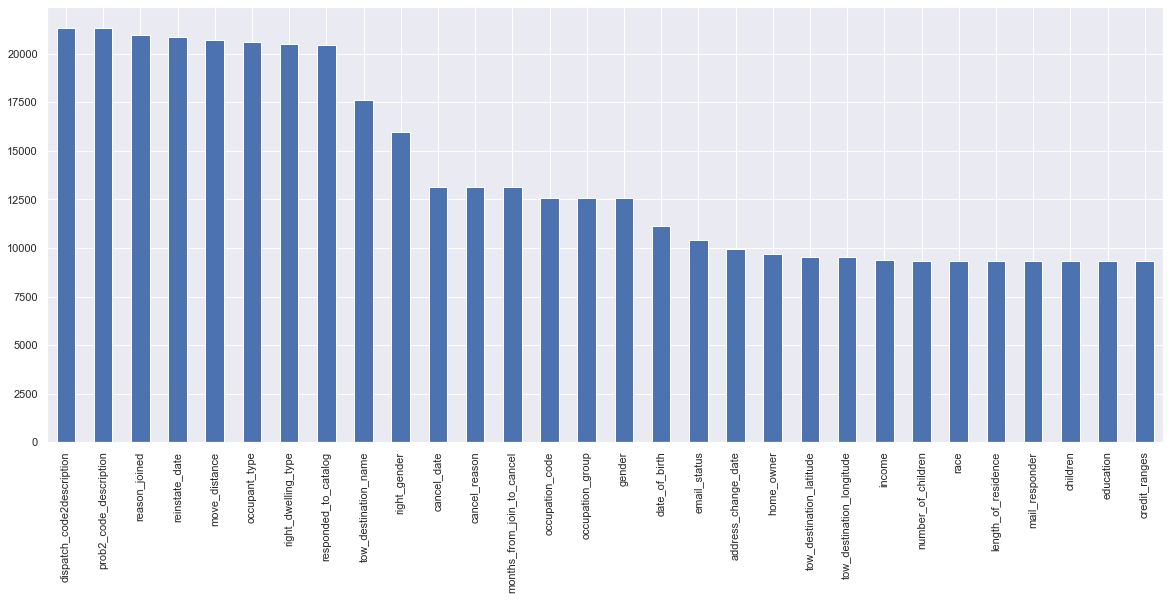

In [15]:
nulls = memberanalysis.isnull().sum()
nulls.nlargest(30).plot(kind = 'bar', figsize = (20,8))

# Working on Missing Values

In [16]:
memberanalysis['reason_joined'].value_counts()

U                      168
Dependable Services    127
5                      45 
Family Plan Avail      19 
Nation Wide Rd Srv     7  
Gift Membership        5  
Free Membership        4  
3                      3  
Club Reputation        3  
7                      1  
Prior Family Exp       1  
Variety of Services    1  
Convenient Offices     1  
Recommend/Referral     1  
Direct Mail            1  
Other                  1  
Name: reason_joined, dtype: int64

In [17]:
memberanalysis['reason_joined'].fillna('UNKNOWN', inplace = True)

In [18]:
memberanalysis['reason_joined'].value_counts()

UNKNOWN                20956
U                      168  
Dependable Services    127  
5                      45   
Family Plan Avail      19   
Nation Wide Rd Srv     7    
Gift Membership        5    
Free Membership        4    
Club Reputation        3    
3                      3    
Recommend/Referral     1    
Direct Mail            1    
Variety of Services    1    
Convenient Offices     1    
Prior Family Exp       1    
7                      1    
Other                  1    
Name: reason_joined, dtype: int64

In [19]:
Dependable_Services_Group = memberanalysis.loc[memberanalysis['reason_joined'] == 'Dependable Services']
Non_Dependable_Services_Group = memberanalysis.loc[memberanalysis['reason_joined'] != 'Dependable Services']

(0.0, 160.0)

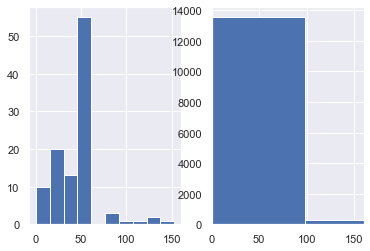

In [20]:
fig, ax = plt.subplots(nrows = 1, ncols = 2)
ax[0].hist(Dependable_Services_Group['total_cost']);
ax[1].hist(Non_Dependable_Services_Group['total_cost'], bins = 100);
ax[1].set_xlim(0, 160)

In [21]:
memberanalysis['income'].value_counts()

100-149,999      2577
90-99,999        2400
70-79,999        1000
50-59,999        888 
40-49,999        771 
10-19,999        688 
175 - 199,999    600 
30-39,999        553 
60-69,999        541 
150 - 174,999    438 
20-29,999        425 
200 - 249,999    424 
250K+            397 
Under 10K        226 
80-89,999        15  
Name: income, dtype: int64

In [22]:
memberanalysis['income'].fillna('unknown', inplace = True)
memberanalysis['income'].value_counts()

unknown          9401
100-149,999      2577
90-99,999        2400
70-79,999        1000
50-59,999        888 
40-49,999        771 
10-19,999        688 
175 - 199,999    600 
30-39,999        553 
60-69,999        541 
150 - 174,999    438 
20-29,999        425 
200 - 249,999    424 
250K+            397 
Under 10K        226 
80-89,999        15  
Name: income, dtype: int64

In [23]:
memberanalysis['income'] = memberanalysis['income'].map({ 'unknown' : 'Unknown' ,
                                   
                                    '250K+':'Large',
                                    '200 - 249,999': 'Large',
                                    '175 - 199,999': 'Large',
                                    '150 - 174,999': 'Large',
                                    '100-149,999': 'Large',

                                    '50-59,999': 'Medium',
                                    '60-69,999': 'Medium',
                                    '70-79,999': 'Medium',
                                    '80-89,999': 'Medium',
                                    '90-99,999': 'Medium',

                                    '40-49,999': 'Small',
                                    '30-39,999': 'Small',
                                    '20-29,999': 'Small',
                                    '10-19,999': 'Small',
                                    'Under 10K': 'Small'})

In [24]:
memberanalysis['income'].value_counts()

Unknown    9401
Medium     4844
Large      4436
Small      2663
Name: income, dtype: int64

<AxesSubplot:>

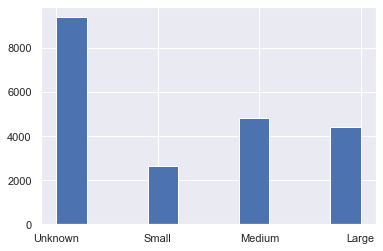

In [25]:
memberanalysis['income'].hist()

In [26]:
memberanalysis['home_owner'].value_counts()

Home Owner             11121
Renter                 491  
Probable Renter        10   
Probable Home Owner    7    
Name: home_owner, dtype: int64

In [27]:
memberanalysis['home_owner'].fillna('Unknown', inplace = True)
memberanalysis['home_owner'].value_counts()

Home Owner             11121
Unknown                9715 
Renter                 491  
Probable Renter        10   
Probable Home Owner    7    
Name: home_owner, dtype: int64

<AxesSubplot:>

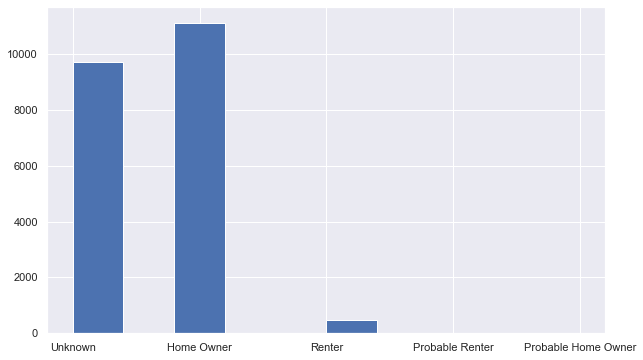

In [28]:
memberanalysis['home_owner'].hist(figsize = (10,6))

In [29]:
def yes_noer(x):
    if x == 'Y':
        return 1
    elif x == 'N':
        return 0
    else:
        return np.nan

In [30]:
memberanalysis['fsv_cmsi_flag'] = memberanalysis['fsv_cmsi_flag'].apply(yes_noer)
memberanalysis['fsv_cmsi_flag'].value_counts()

0    20393
1    951  
Name: fsv_cmsi_flag, dtype: int64

In [31]:
memberanalysis.groupby(['home_owner'])['fsv_cmsi_flag'].mean()

home_owner
Home Owner             0.058988
Probable Home Owner    0.000000
Probable Renter        0.000000
Renter                 0.097760
Unknown                0.025425
Name: fsv_cmsi_flag, dtype: float64

<AxesSubplot:xlabel='fsv_cmsi_flag', ylabel='count'>

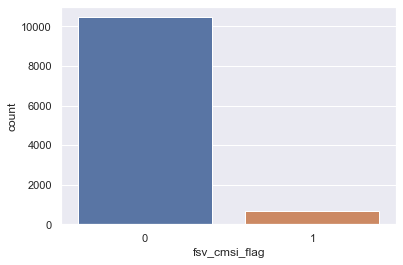

In [32]:
ho = memberanalysis.loc[memberanalysis['home_owner']== 'Home Owner']

sns.countplot(ho['fsv_cmsi_flag'])

In [33]:
memberanalysis['fsv_mortgage_flag'] = memberanalysis['fsv_mortgage_flag'].apply(yes_noer)

bought_morgage = ho.loc[ho['fsv_cmsi_flag']==1]
bought_morgage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 656 entries, 423 to 21332
Columns: 112 entries, individual_key to was_towed_to_aar_referral
dtypes: float64(35), int64(1), object(76)
memory usage: 579.1+ KB


In [34]:
memberanalysis['fsv_mortgage_flag'].value_counts()

0    21317
1    27   
Name: fsv_mortgage_flag, dtype: int64

(array([0, 1, 2]),
 [Text(0, 0, 'Medium'), Text(1, 0, 'Large'), Text(2, 0, 'Small')])

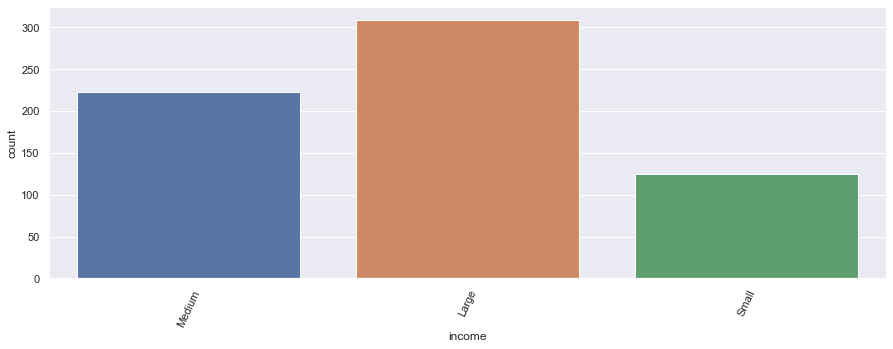

In [35]:
plt.figure(figsize = (15,5))
sns.countplot(bought_morgage['income'])
plt.xticks(rotation = 65)

In [36]:
memberanalysis.groupby('household_key')['fsv_cmsi_flag'].max()

household_key
875.0          0
969.0          0
3338.0         0
8718.0         0
11524.0        0
13422.0        0
19747.0        0
20469.0        1
20850.0        0
25365.0        0
30007.0        0
37468.0        0
38093.0        1
41756.0        1
43381.0        0
49578.0        0
55047.0        0
55295.0        0
73421.0        0
93896.0        0
94927.0        0
103545.0       0
106487.0       0
115289.0       0
115306.0       0
115346.0       0
115351.0       0
115430.0       0
116806.0       1
117430.0       0
118068.0       0
140185.0       0
143051.0       0
143458.0       0
143890.0       0
158326.0       0
170964.0       0
171827.0       0
175016.0       0
175310.0       0
177039.0       0
179730.0       0
193851.0       0
193981.0       0
193988.0       0
195448.0       0
195458.0       0
195680.0       0
196101.0       0
197694.0       0
197818.0       0
197857.0       0
252323.0       0
252739.0       0
255885.0       0
258906.0       0
261917.0       0
268698.0       0


In [37]:
memberanalysis['member_type'].value_counts()

Associate    10843
Primary      10496
INsider      4    
Name: member_type, dtype: int64

In [38]:
memberanalysis['member_type'].unique()

array([nan, 'Primary', 'Associate', 'INsider'], dtype=object)

In [39]:
memberanalysis['member_type'].isnull().sum()

1

In [40]:
memberanalysis = memberanalysis.dropna(how='any', subset=['member_type'])

In [41]:
memberanalysis['cancel_reason'].isnull().sum()

13166

In [42]:
memberanalysis['cancel_reason'].fillna('Unknown', inplace = True)
memberanalysis['cancel_reason'].value_counts()

Unknown                               13166
Non-Payment                           2680 
Deceased                              1640 
Members Request                       1550 
Data Problem                          465  
No Longer Driving                     431  
Transfer Member                       332  
Cancelled Do Not Renew                321  
Dup Membership                        224  
Transfer Member Suspend               183  
Moved Out of Terr                     78   
Do Not Renew                          76   
Cancelled Mbrs Request                56   
No Longer in Household                41   
Cancel Process - Renewal No Pay       12   
Health Issue                          12   
ERS Cncl MShip Program                12   
Noncompliant Age                      12   
Noncompliant Address                  9    
ERS Decline CC                        9    
Cancel Process - Future Cancel DNR    7    
Duplicate Assoc - Offer               4    
*BAD CHECKS*                    

In [43]:
memberanalysis['city'].isnull().sum()

0

In [44]:
memberanalysis['city'].value_counts()[:30]

WARWICK             2815
CRANSTON            2742
PROVIDENCE          1690
NORTH PROVIDENCE    948 
COVENTRY            778 
JOHNSTON            703 
EAST GREENWICH      641 
PAWTUCKET           640 
NORTH KINGSTOWN     637 
WEST WARWICK        606 
CUMBERLAND          560 
NARRAGANSETT        531 
WAKEFIELD           497 
RIVERSIDE           436 
LINCOLN             402 
EAST PROVIDENCE     372 
PORTSMOUTH          328 
MANVILLE            322 
NEWPORT             321 
BARRINGTON          313 
GREENVILLE          288 
SMITHFIELD          284 
BRISTOL             279 
MIDDLETOWN          272 
RUMFORD             268 
WOONSOCKET          262 
TIVERTON            253 
NORTH SCITUATE      222 
JAMESTOWN           218 
NORTH SMITHFIELD    179 
Name: city, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, 'PAWTUCKET'),
  Text(1, 0, 'MIDDLETOWN'),
  Text(2, 0, 'CHARLESTOWN'),
  Text(3, 0, 'WEST KINGSTON'),
  Text(4, 0, 'EAST GREENWICH'),
  Text(5, 0, 'SMITHFIELD'),
  Text(6, 0, 'JAMESTOWN'),
  Text(7, 0, 'CRANSTON'),
  Text(8, 0, 'WARWICK'),
  Text(9, 0, 'NORTH KINGSTOWN'),
  Text(10, 0, 'WEST GREENWICH'),
  Text(11, 0, 'PORTSMOUTH'),
  Text(12, 0, 'GREENVILLE'),
  Text(13, 0, 'JOHNSTON'),
  Text(14, 0, 'WAKEFIELD'),
  Text(15, 0, 'PEACE DALE'),
  Text(16, 0, 'COVENTRY'),
  Text(17, 0, 'SLATERSVILLE'),
  Text(18, 0, 'NORTH SMITHFIELD'),
  Text(19, 0, 'HOPE'),
  Text(20, 0, 'NARRAGANSETT'),
  Text(21, 0, 'NORTH SCITUATE'),
  Text(22, 0, 'NORTH PROVIDENCE'),
  Text(23, 0, 'RIVERSIDE'),
  Text(24, 0, 'WEST WARWICK'),
  Text(25, 0, 'CUMBERLAND'),
  Text(26, 0, 'LINCOLN'),
  Text(27, 0, 'S

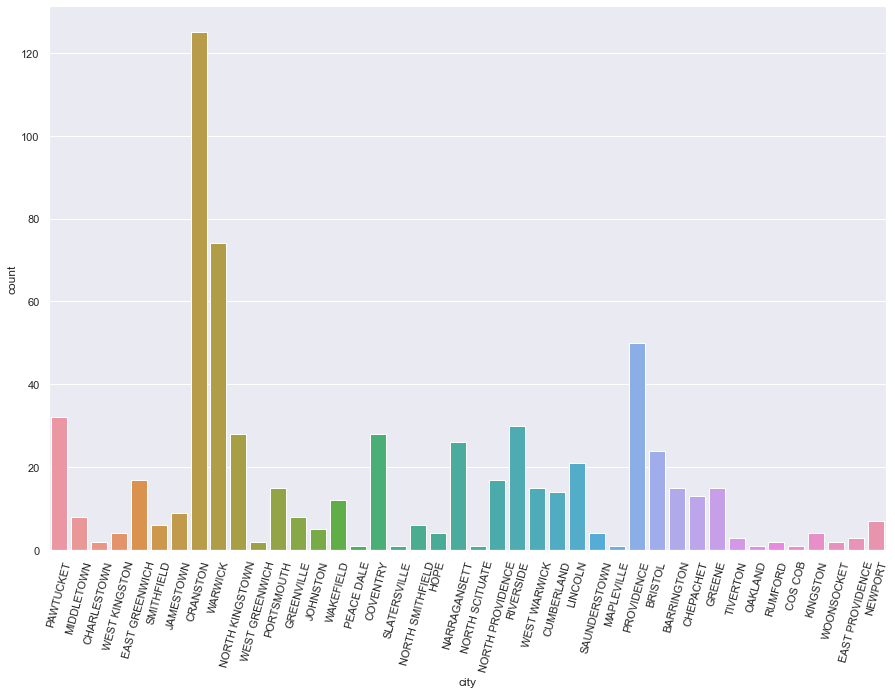

In [45]:
plt.figure(figsize = (15,10))
sns.countplot(bought_morgage['city'])
plt.xticks(rotation = 75)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'AUSTIN HEALEY'),
  Text(1, 0, 'FWD CORPORATION'),
  Text(2, 0, 'HARLEY DAVIDSON'),
  Text(3, 0, 'MG'),
  Text(4, 0, 'APRILIA')])

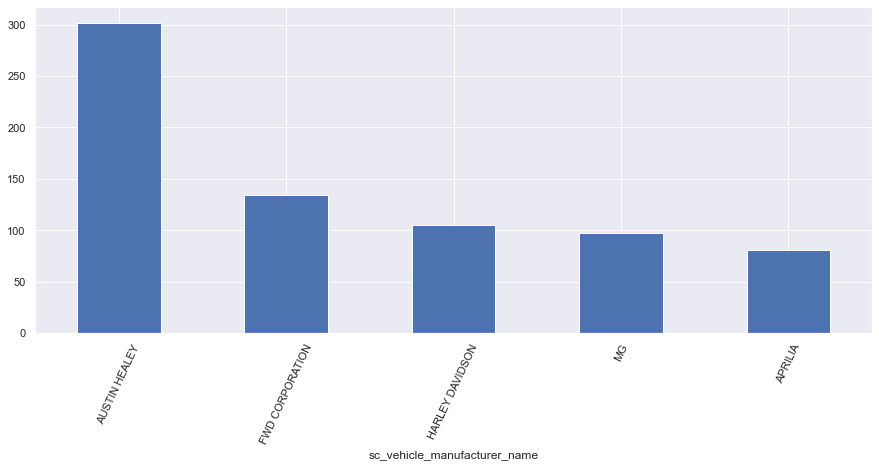

In [46]:
memberanalysis.groupby('sc_vehicle_manufacturer_name')['total_cost'].mean().nlargest(5).plot(kind = 'bar', figsize =(15,6))
plt.xticks(rotation = 65)

In [47]:
memberanalysis.dispatch_code2description

1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
10      NaN
11      NaN
12      NaN
13      NaN
14      NaN
15      NaN
16      NaN
17      NaN
18      NaN
19      NaN
20      NaN
21      NaN
22      NaN
23      NaN
24      NaN
25      NaN
26      NaN
27      NaN
28      NaN
29      NaN
30      NaN
31      NaN
32      NaN
33      NaN
34      NaN
35      NaN
36      NaN
37      NaN
38      NaN
39      NaN
40      NaN
41      NaN
42      NaN
43      NaN
44      NaN
45      NaN
46      NaN
47      NaN
48      NaN
49      NaN
50      NaN
51      NaN
52      NaN
53      NaN
54      NaN
55      NaN
56      NaN
57      NaN
58      NaN
59      NaN
60      NaN
61      NaN
62      NaN
63      NaN
64      NaN
65      NaN
66      NaN
67      NaN
68      NaN
69      NaN
70      NaN
71      NaN
72      NaN
73      NaN
74      NaN
75      NaN
76      NaN
77      NaN
78      NaN
79      NaN
80      NaN
81      NaN
82      NaN
83      NaN
84  

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Collision/Police Tow'),
  Text(1, 0, 'Other Service (describe)'),
  Text(2, 0, 'Windshield Damage'),
  Text(3, 0, 'Leaking Fluids'),
  Text(4, 0, 'Taxi/Shuttle Service')])

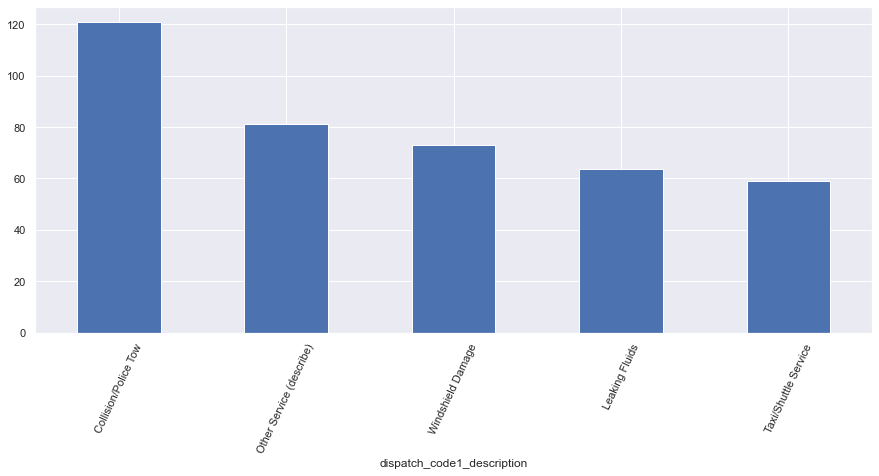

In [48]:
memberanalysis.groupby('dispatch_code1_description')['total_cost'].mean().nlargest(5).plot(kind = 'bar', figsize =(15,6))
plt.xticks(rotation = 65)

In [49]:
memberanalysis.groupby('dispatch_code1_description')['total_cost'].mean().nlargest(5)

dispatch_code1_description
Collision/Police Tow        120.775894
Other Service (describe)    81.300000 
Windshield Damage           72.833333 
Leaking Fluids              63.458511 
Taxi/Shuttle Service        58.962500 
Name: total_cost, dtype: float64

In [50]:
memberanalysis.shape

(21343, 112)

In [51]:
824/21343

0.038607505973855594

In [52]:
memberanalysis.groupby('dispatch_code1_description')['total_cost'].count().nlargest(5) 

dispatch_code1_description
Member Requests Battery Service        3796
Flat Tire w/spare                      2402
No Crank - Jump Start                  1187
Key Locked In Passenger Compartment    1033
Other Required Tow (describe)          819 
Name: total_cost, dtype: int64

In [53]:
memberanalysis.groupby('dispatch_code1_description')['total_cost'].count().nlargest(5)

dispatch_code1_description
Member Requests Battery Service        3796
Flat Tire w/spare                      2402
No Crank - Jump Start                  1187
Key Locked In Passenger Compartment    1033
Other Required Tow (describe)          819 
Name: total_cost, dtype: int64

In [54]:
memberanalysis.groupby('sc_vehicle_model_name')['total_cost'].count().nlargest(5)

sc_vehicle_model_name
CAMRY      824
COROLLA    595
ACCORD     547
CIVIC      411
ALTIMA     340
Name: total_cost, dtype: int64

In [55]:
memberanalysis['state_grouped'] = memberanalysis['state___grouped']
memberanalysis['state_grouped'].isnull().sum()

0

In [56]:
memberanalysis['state_grouped'].value_counts()

RI    20937
CT    406  
Name: state_grouped, dtype: int64

(array([0, 1]), [Text(0, 0, 'RI'), Text(1, 0, 'CT')])

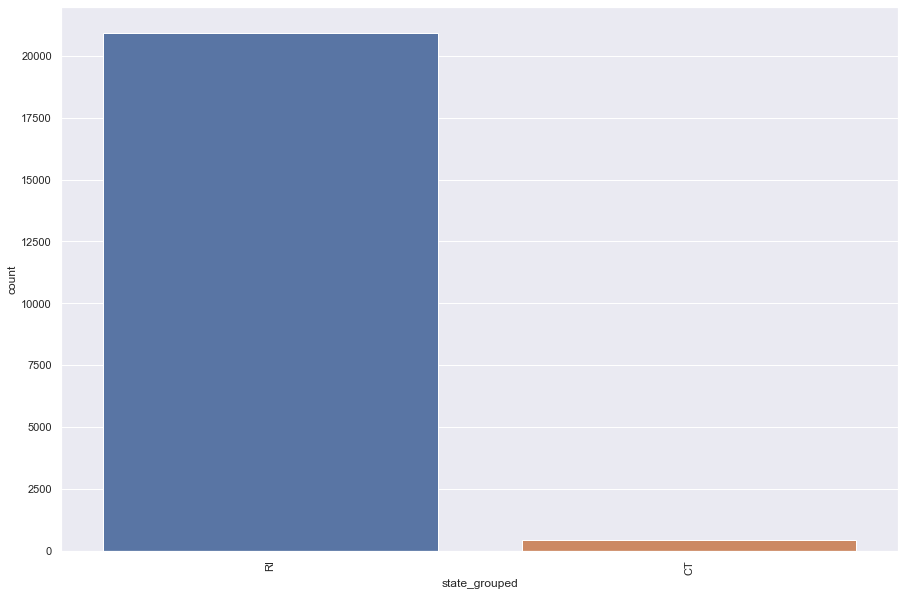

In [57]:
plt.figure(figsize = (15,10))
sns.countplot(memberanalysis['state_grouped'])
plt.xticks(rotation = 90)

In [58]:
memberanalysis.groupby('state_grouped')['total_cost'].mean()

state_grouped
CT    40.034405
RI    47.361980
Name: total_cost, dtype: float64

In [59]:
memberanalysis['education'].isnull().sum()

9333

In [60]:
memberanalysis['education'].fillna('Unknown', inplace = True)
memberanalysis['education'].value_counts()

Unknown              13597
Some College         3058 
High School          2901 
Completed College    1602 
Graduated School     185  
Name: education, dtype: int64

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Some College'),
  Text(1, 0, 'Unknown'),
  Text(2, 0, 'High School'),
  Text(3, 0, 'Completed College'),
  Text(4, 0, 'Graduated School')])

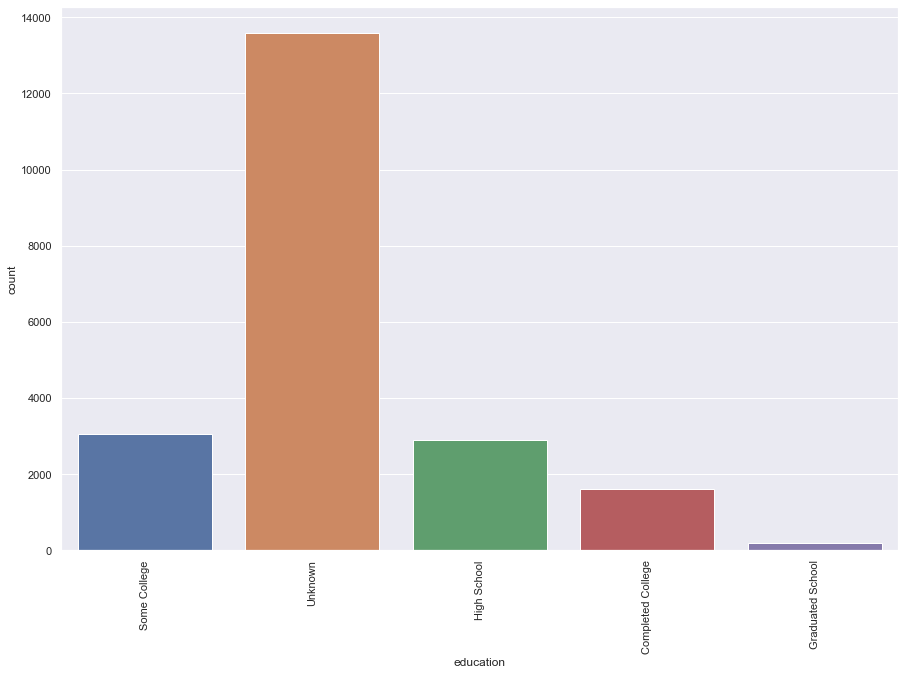

In [61]:
plt.figure(figsize = (15,10))
sns.countplot(memberanalysis['education'])
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Completed College'),
  Text(1, 0, 'Unknown'),
  Text(2, 0, 'Some College'),
  Text(3, 0, 'High School'),
  Text(4, 0, 'Graduated School')])

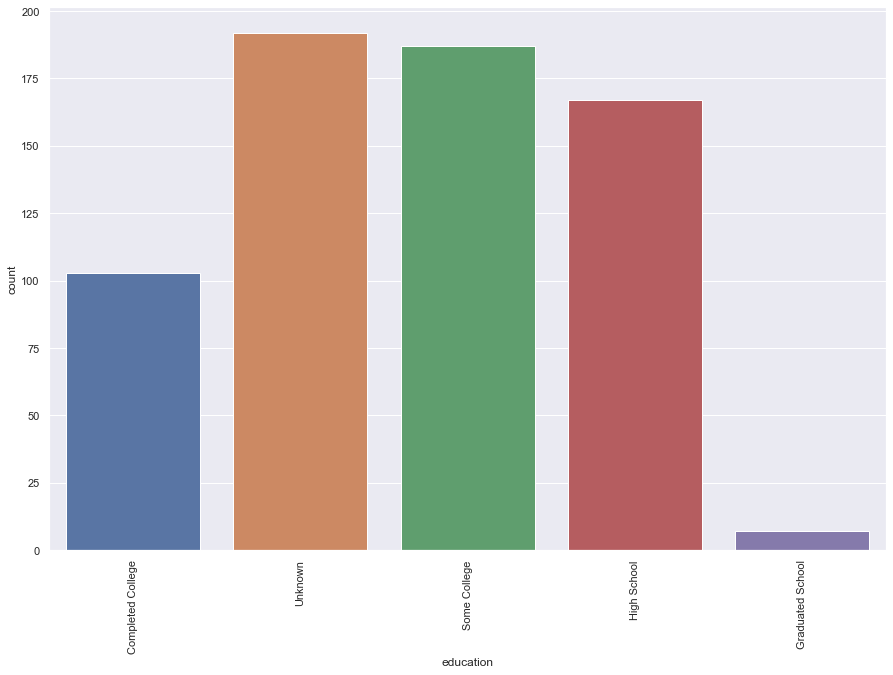

In [62]:
plt.figure(figsize = (15,10))
sns.countplot(bought_morgage['education'])
plt.xticks(rotation = 90)

In [63]:
memberanalysis.groupby('education')['total_cost'].mean()

education
Completed College    48.140840
Graduated School     44.439583
High School          47.322308
Some College         47.318179
Unknown              47.153139
Name: total_cost, dtype: float64

In [64]:
[i for i in memberanalysis.columns if i.startswith('fsv')]

['fsv_cmsi_flag',
 'fsv_credit_card_flag',
 'fsv_deposit_program_flag',
 'fsv_home_equity_flag',
 'fsv_id_theft_flag',
 'fsv_mortgage_flag']

In [65]:
memberanalysis['fsv_mortgage_flag'].value_counts()

0    21316
1    27   
Name: fsv_mortgage_flag, dtype: int64

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

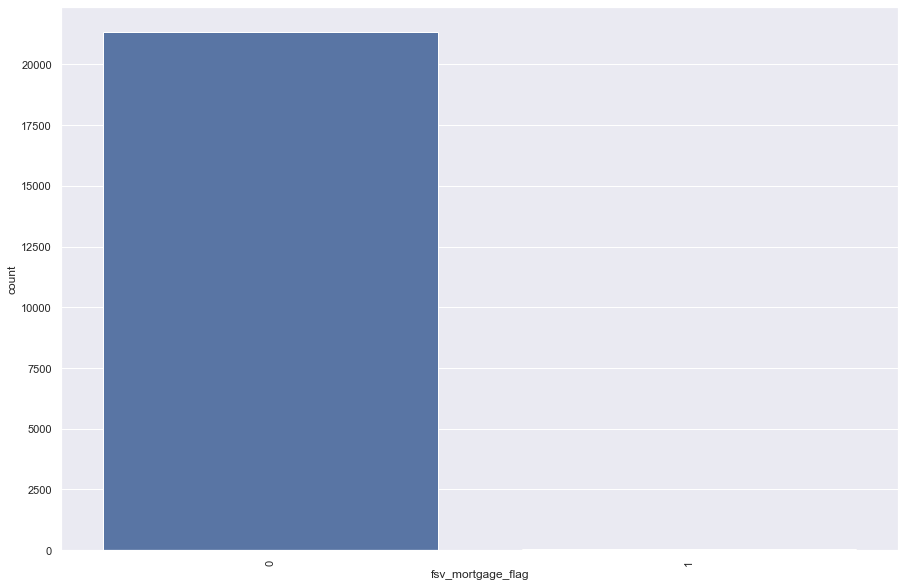

In [66]:
plt.figure(figsize = (15,10))
sns.countplot(memberanalysis['fsv_mortgage_flag'])
plt.xticks(rotation = 90)

In [67]:
memberanalysis.groupby('fsv_mortgage_flag')['total_cost'].mean()

fsv_mortgage_flag
0    47.270467
1    49.228261
Name: total_cost, dtype: float64

In [68]:
memberanalysis.groupby('state_grouped')['fsv_mortgage_flag'].mean()

state_grouped
CT    0.00000
RI    0.00129
Name: fsv_mortgage_flag, dtype: float64

In [69]:
memberanalysis.groupby('state_grouped')['fsv_mortgage_flag'].size()

state_grouped
CT    406  
RI    20937
Name: fsv_mortgage_flag, dtype: int64

In [70]:
memberanalysis['children'].value_counts()

Yes    6631
No     5379
Name: children, dtype: int64

In [71]:
memberanalysis['children'].isnull().sum()

9333

In [72]:
memberanalysis['number_of_children'].isnull().sum()

9333

In [73]:
memberanalysis['number_of_children'].value_counts()

No children       5482
One Child         3871
Two Children      1582
Three Children    750 
Four Children     276 
Five Children     45  
Six Children      4   
Name: number_of_children, dtype: int64

In [74]:
memberanalysis.groupby('children')['number_of_children'].describe()

,count,unique,top,freq
children,,,,
No,5379,1,No children,5379
Yes,6631,7,One Child,3871


In [75]:
# memberanalysis['number_of_children'] = memberanalysis['number_of_children'].map({ 'No children' : 0 ,
#                                     'One Child':1,
#                                     'Two Children': 2,
#                                     'Three Children': 3,
#                                     'Four Children': 4,
#                                     'Five Children': 5,
#                                     'Six Children': 6})numeric_cols =  banking_copy.loc[:, numeric_cols]

# Dictionary Comprehension

In [76]:
vals = memberanalysis['number_of_children'].value_counts().index
nums = list(range(7))

memberanalysis['number_of_children'] = memberanalysis['number_of_children'].map({v:n for v, n in zip(vals, nums)})
memberanalysis['number_of_children'].value_counts()

0.0    5482
1.0    3871
2.0    1582
3.0    750 
4.0    276 
5.0    45  
6.0    4   
Name: number_of_children, dtype: int64

In [77]:
memberanalysis.loc[(memberanalysis['number_of_children'] == 0 ) & (memberanalysis['children'] == 'Yes')].shape

(103, 113)

In [78]:
children_problem = memberanalysis.loc[(memberanalysis['number_of_children'] == 0 ) & (memberanalysis['children'] == 'Yes')]
children_problem.groupby('household_key').mean().head()

,individual_key,zip5,zip9,fsv_cmsi_flag,fsv_mortgage_flag,number_of_children,length_of_residence,do_not_direct_mail_solicit,email_available,ers_ent_count_year_1,ers_ent_count_year_2,ers_ent_count_year_3,ers_member_cost_year_1,ers_member_cost_year_2,ers_member_cost_year_3,right_individual_key,member_key,member_number_associate_id,member_tenure_years,membership_id,months_from_join_to_cancel,zip,basic_cost,calculated_tow_miles,dispatch_code2description,is_duplicate,is_nsr,member_match_flag,member_number_and_associate_id,plus_cost,premier_cost,rec_id,total_cost,tow_destination_latitude,tow_destination_longitude,was_duplicated,was_towed_to_aar_referral
household_key,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
252739.0,5960222.0,2886.0,28867910.0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,58.3,5960222.0,1503579.0,1149020.0,21.0,11490.0,NaN,2886.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
431187.0,10122708.0,2920.0,29200632.0,0,0,0.0,14.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,53.0,10122708.0,1510727.0,5560100.0,8.0,55601.0,NaN,2920.0,53.0,0.0,NaN,0.0,0.0,1.0,5560100.0,0.0,0.0,6257302.0,53.0,0.0,0.0,0.0,0.0
687773.0,17494924.0,2906.0,29065182.0,0,0,0.0,9.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,17494924.0,1503512.0,1127820.0,34.0,11278.0,314.0,2130.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1589054.0,20921229.0,2864.0,28647033.0,0,0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20921229.0,2628551.0,3043020.0,3.0,30430.0,12.0,2864.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1663584.0,184280197.0,2889.0,28898532.0,0,0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,184280197.0,2275688.0,2128820.0,20.0,21288.0,69.0,2889.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
memberanalysis['credit_ranges'].isnull().sum()

9333

In [80]:
memberanalysis['kcl_b_ind_mosaicsgrouping'].isnull().sum()

5462

In [81]:
# memberanalysis['kcl_b_ind_mosaicsgrouping'].fillna('kcl_b_ind_mosaicsgrouping', inplace = True)
# memberanalysis['kcl_b_ind_mosaicsgrouping'].value_counts()

In [82]:
memberanalysis_exp = pd.get_dummies(memberanalysis, columns =['kcl_b_ind_mosaicsgrouping'])

In [83]:
[i for i in memberanalysis_exp.columns if i.startswith('kcl')]

['kcl_b_ind_mosaicsgrouping_Aspirational Fusion',
 'kcl_b_ind_mosaicsgrouping_Autumn Years',
 'kcl_b_ind_mosaicsgrouping_Blue Sky Boomers',
 'kcl_b_ind_mosaicsgrouping_Booming with Confidence',
 'kcl_b_ind_mosaicsgrouping_Cultural Connections',
 'kcl_b_ind_mosaicsgrouping_Economic Challenges',
 'kcl_b_ind_mosaicsgrouping_Families in Motion',
 'kcl_b_ind_mosaicsgrouping_Family Union',
 'kcl_b_ind_mosaicsgrouping_Flourishing Families',
 'kcl_b_ind_mosaicsgrouping_Golden Year Guardians',
 'kcl_b_ind_mosaicsgrouping_Middle Class Melting Pot',
 'kcl_b_ind_mosaicsgrouping_Pastoral Pride',
 'kcl_b_ind_mosaicsgrouping_Power Elite',
 'kcl_b_ind_mosaicsgrouping_Promising Families',
 'kcl_b_ind_mosaicsgrouping_Significant Singles',
 'kcl_b_ind_mosaicsgrouping_Singles and Starters',
 'kcl_b_ind_mosaicsgrouping_Surburban Style',
 'kcl_b_ind_mosaicsgrouping_Thriving Boomers',
 'kcl_b_ind_mosaicsgrouping_Young City Solos']

In [84]:
[i for i in memberanalysis.columns if i.startswith('fsv')]

['fsv_cmsi_flag',
 'fsv_credit_card_flag',
 'fsv_deposit_program_flag',
 'fsv_home_equity_flag',
 'fsv_id_theft_flag',
 'fsv_mortgage_flag']

In [85]:
memberanalysis[['fsv_cmsi_flag',
 'fsv_credit_card_flag',
 'fsv_deposit_program_flag',
 'fsv_home_equity_flag',
 'fsv_id_theft_flag',
 'fsv_mortgage_flag'
    ]].head(8)

,fsv_cmsi_flag,fsv_credit_card_flag,fsv_deposit_program_flag,fsv_home_equity_flag,fsv_id_theft_flag,fsv_mortgage_flag
1,0,Y,N,N,N,0
2,0,Y,N,N,N,0
3,0,Y,N,N,N,0
4,0,Y,N,N,N,0
5,0,Y,N,N,N,0
6,0,Y,N,N,N,0
7,0,Y,N,N,N,0
8,0,Y,N,N,N,0


In [86]:
for col in [
  #'fsv_cmsi_flag',
 'fsv_credit_card_flag',
 'fsv_deposit_program_flag',
 'fsv_home_equity_flag',
 'fsv_id_theft_flag']:
 # 'fsv_mortgage_flag'
  
    memberanalysis_exp[col]=memberanalysis[col].apply(yes_noer)

In [87]:
memberanalysis_exp[col]=memberanalysis[col].apply(yes_noer)

In [88]:
household_grouped = memberanalysis_exp.groupby('household_key').mean()
household_grouped.head(8)

,individual_key,zip5,zip9,fsv_cmsi_flag,fsv_credit_card_flag,fsv_deposit_program_flag,fsv_home_equity_flag,fsv_id_theft_flag,fsv_mortgage_flag,number_of_children,length_of_residence,do_not_direct_mail_solicit,email_available,ers_ent_count_year_1,ers_ent_count_year_2,ers_ent_count_year_3,ers_member_cost_year_1,ers_member_cost_year_2,ers_member_cost_year_3,right_individual_key,member_key,member_number_associate_id,member_tenure_years,membership_id,months_from_join_to_cancel,zip,basic_cost,calculated_tow_miles,dispatch_code2description,is_duplicate,is_nsr,member_match_flag,member_number_and_associate_id,plus_cost,premier_cost,rec_id,total_cost,tow_destination_latitude,tow_destination_longitude,was_duplicated,was_towed_to_aar_referral,kcl_b_ind_mosaicsgrouping_Aspirational Fusion,kcl_b_ind_mosaicsgrouping_Autumn Years,kcl_b_ind_mosaicsgrouping_Blue Sky Boomers,kcl_b_ind_mosaicsgrouping_Booming with Confidence,kcl_b_ind_mosaicsgrouping_Cultural Connections,kcl_b_ind_mosaicsgrouping_Economic Challenges,kcl_b_ind_mosaicsgrouping_Families in Motion,kcl_b_ind_mosaicsgrouping_Family Union,kcl_b_ind_mosaicsgrouping_Flourishing Families,kcl_b_ind_mosaicsgrouping_Golden Year Guardians,kcl_b_ind_mosaicsgrouping_Middle Class Melting Pot,kcl_b_ind_mosaicsgrouping_Pastoral Pride,kcl_b_ind_mosaicsgrouping_Power Elite,kcl_b_ind_mosaicsgrouping_Promising Families,kcl_b_ind_mosaicsgrouping_Significant Singles,kcl_b_ind_mosaicsgrouping_Singles and Starters,kcl_b_ind_mosaicsgrouping_Surburban Style,kcl_b_ind_mosaicsgrouping_Thriving Boomers,kcl_b_ind_mosaicsgrouping_Young City Solos
household_key,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
875.0,6.171366e+07,2920.777778,2.920950e+07,0.000000,0.055556,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.333333,0.785714,0.428571,0.714286,46.239286,25.221429,88.952143,6.171366e+07,3.230498e+06,1.831044e+07,28.944444,183104.222222,157.75,2920.777778,49.371429,8.014286,NaN,0.0,0.071429,1.0,2.271141e+07,26.571429,0.0,7.012414e+06,75.942857,20.500000,-35.500000,0.071429,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.777778,0.0,0.0,0.222222,0.0,0.0,0.0
969.0,1.991850e+04,2919.000000,2.919102e+07,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,14.000000,0.0,0.833333,0.000000,0.666667,1.500000,0.000000,58.808333,150.595000,1.991850e+04,1.763435e+06,1.181018e+06,35.333333,11810.000000,NaN,2919.000000,43.775000,2.250000,NaN,0.0,0.000000,1.0,1.181015e+06,12.750000,0.0,8.011067e+06,56.525000,31.466350,-53.382865,0.250000,0.25,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
3338.0,6.144999e+07,2919.000000,2.919492e+07,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,5.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.144999e+07,2.243354e+06,2.661641e+07,37.333333,266164.000000,312.00,2919.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
8718.0,1.993845e+05,2910.000000,2.910341e+07,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,15.000000,0.0,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.993845e+05,3.053750e+06,1.921401e+07,10.000000,192140.000000,3.00,2910.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
11524.0,7.749899e+06,2919.000000,2.919507e+07,0.000000,0.000000,0.0,0.0,0.0,0.0,1.142857,12.142857,0.0,0.857143,0.333333,2.166667,1.000000,19.616667,122.058333,53.000000,7.749899e+06,1.527210e+06,1.971001e+07,36.285714,197100.000000,112.00,2919.000000,58.850000,1.200000,NaN,0.0,0.000000,1.0,1.971001e+07,0.000000,0.0,1.720385e+07,58.850000,20.880450,-35.721380,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,1.0,0.0
13422.0,8.558237e+07,2816.000000,2.816776e+07,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,15.000000,0.0,0.500000,0.250000,0.000000,0.000000,14.712500,0.000000,0.000000,8.558237e+07,4.923463e

In [89]:
def buy_or_not(x):
    if x > 0:
        return 1
    else:
        return 0

In [90]:
household_grouped['fsv_mortgage_flag'].apply(buy_or_not).head()

household_key
875.0      0
969.0      0
3338.0     0
8718.0     0
11524.0    0
Name: fsv_mortgage_flag, dtype: int64

In [91]:
household_grouped['fsv_mortgage_flag'] = household_grouped['fsv_mortgage_flag'].apply(buy_or_not)

In [92]:
household_grouped['fsv_mortgage_flag'].value_counts()

0    5229
1    11  
Name: fsv_mortgage_flag, dtype: int64

In [93]:
fsvs = [col for col in household_grouped.columns if col.startswith('fsv')]
fsvs

['fsv_cmsi_flag',
 'fsv_credit_card_flag',
 'fsv_deposit_program_flag',
 'fsv_home_equity_flag',
 'fsv_id_theft_flag',
 'fsv_mortgage_flag']

In [94]:
fsvs = [col for col in household_grouped.columns if col.startswith('fsv')]
for col in fsvs:
    household_grouped[col]= household_grouped[col].apply(buy_or_not)

In [95]:
household_grouped[fsvs].describe()

,fsv_cmsi_flag,fsv_credit_card_flag,fsv_deposit_program_flag,fsv_home_equity_flag,fsv_id_theft_flag,fsv_mortgage_flag
count,5240.000000,5240.000000,5240.000000,5240.000000,5240.000000,5240.000000
mean,0.070229,0.110305,0.005344,0.001145,0.044847,0.002099
std,0.255557,0.313300,0.072911,0.033822,0.206988,0.045774
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# EDA and Feature Extraction

# 1. Plot Feature Importance

In [96]:
household_grouped.columns

Index(['individual_key', 'zip5', 'zip9', 'fsv_cmsi_flag',
       'fsv_credit_card_flag', 'fsv_deposit_program_flag',
       'fsv_home_equity_flag', 'fsv_id_theft_flag', 'fsv_mortgage_flag',
       'number_of_children', 'length_of_residence',
       'do_not_direct_mail_solicit', 'email_available', 'ers_ent_count_year_1',
       'ers_ent_count_year_2', 'ers_ent_count_year_3',
       'ers_member_cost_year_1', 'ers_member_cost_year_2',
       'ers_member_cost_year_3', 'right_individual_key', 'member_key',
       'member_number_associate_id', 'member_tenure_years', 'membership_id',
       'months_from_join_to_cancel', 'zip', 'basic_cost',
       'calculated_tow_miles', 'dispatch_code2description', 'is_duplicate',
       'is_nsr', 'member_match_flag', 'member_number_and_associate_id',
       'plus_cost', 'premier_cost', 'rec_id', 'total_cost',
       'tow_destination_latitude', 'tow_destination_longitude',
       'was_duplicated', 'was_towed_to_aar_referral',
       'kcl_b_ind_mosaicsgroupin

In [97]:
#household_groupedV2 = clean_memberanalysis.drop('date_of_first_purchase', axis = 1)

In [98]:
X = household_grouped.drop('fsv_credit_card_flag', axis = 1)
y = household_grouped.fsv_credit_card_flag

In [99]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

training_features, test_features, \
training_target, test_target, = train_test_split(X, y,
                                               test_size = .2,
                                               random_state=42)

[16:33:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.01899471 0.01913143 0.01964999 0.0222475  0.01574326 0.
 0.02342868 0.         0.01823749 0.03022257 0.0207412  0.01733372
 0.01622482 0.0172269  0.02142164 0.0330771  0.02457841 0.020265
 0.         0.01972312 0.02014305 0.02266369 0.         0.01935548
 0.02206156 0.02182038 0.01989368 0.         0.         0.0262742
 0.         0.021227   0.02752568 0.         0.0206557  0.02314542
 0.02275524 0.01314709 0.02665426 0.01800612 0.00200778 0.02163107
 0.03455764 0.01895611 0.03258596 0.         0.         0.0248554
 0.01897043 0.01997441 0.         0.         0.03003477 0.01236609
 0.03897336 0.01849867 0.01271559 0.02236727 0.0079294 ]


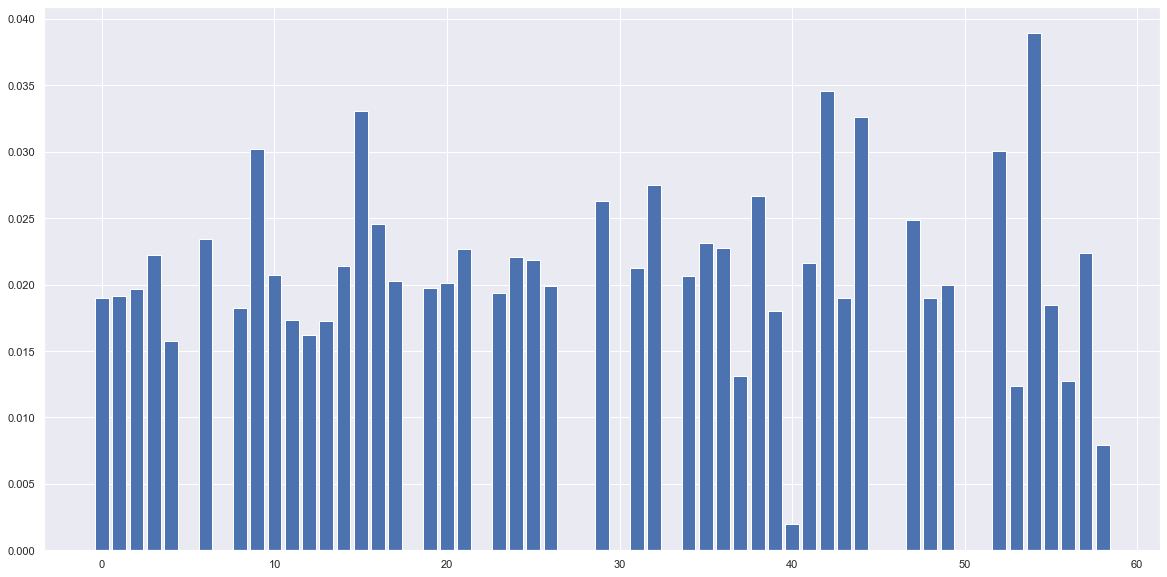

In [100]:
from xgboost import XGBClassifier
from matplotlib import pyplot

plt.figure(figsize=(20,10))

# fit model no training data
model = XGBClassifier()
model.fit(training_features, training_target)
# feature importance
print(model.feature_importances_)
# plot
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()

In [101]:
feature_importances = pd.DataFrame({'Importance Coef' :model.feature_importances_ , 'Features' : training_features.columns})
feature_importances.nlargest(100, 'Importance Coef')

,Importance Coef,Features
54,0.038973,kcl_b_ind_mosaicsgrouping_Significant Singles
42,0.034558,kcl_b_ind_mosaicsgrouping_Blue Sky Boomers
15,0.033077,ers_member_cost_year_1
44,0.032586,kcl_b_ind_mosaicsgrouping_Cultural Connections
9,0.030223,length_of_residence
52,0.030035,kcl_b_ind_mosaicsgrouping_Power Elite
32,0.027526,plus_cost
38,0.026654,was_duplicated
29,0.026274,is_nsr
47,0.024855,kcl_b_ind_mosaicsgrouping_Family Union


# 2. Feature Selection (Removing Zero Impact Values)

In [102]:
col_to_drop = set(['fsv_deposit_program_flag',
'kcl_b_ind_mosaicsgrouping_Significant Singles',
'kcl_b_ind_mosaicsgrouping_Promising Families',
'fsv_home_equity_flag',
'kcl_b_ind_mosaicsgrouping_Pastoral Pride',
'kcl_b_ind_mosaicsgrouping_Middle Class Melting Pot',
'kcl_b_ind_mosaicsgrouping_Golden Year Guardians',
'premier_cost',
'member_match_flag',
'kcl_b_ind_mosaicsgrouping_Economic Challenges',
'fsv_mortgage_flag',
'kcl_b_ind_mosaicsgrouping_Blue Sky Boomers',
'kcl_b_ind_mosaicsgrouping_Aspirational Fusion',
'right_individual_key',
'membership_id',
'dispatch_code2description',
'is_duplicate',
'kcl_b_ind_mosaicsgrouping_Families in Motion', 'zip5', 'zip9','zip','member_key', 'member_number_associate_id' ,
'member_number_and_associate_id' , 'member_key' , 'rec_id' , 'individual_key'])

In [103]:
household_grouped = household_grouped.drop(col_to_drop, axis = 1)

In [104]:
household_grouped.columns

Index(['fsv_cmsi_flag', 'fsv_credit_card_flag', 'fsv_id_theft_flag',
       'number_of_children', 'length_of_residence',
       'do_not_direct_mail_solicit', 'email_available', 'ers_ent_count_year_1',
       'ers_ent_count_year_2', 'ers_ent_count_year_3',
       'ers_member_cost_year_1', 'ers_member_cost_year_2',
       'ers_member_cost_year_3', 'member_tenure_years',
       'months_from_join_to_cancel', 'basic_cost', 'calculated_tow_miles',
       'is_nsr', 'plus_cost', 'total_cost', 'tow_destination_latitude',
       'tow_destination_longitude', 'was_duplicated',
       'was_towed_to_aar_referral', 'kcl_b_ind_mosaicsgrouping_Autumn Years',
       'kcl_b_ind_mosaicsgrouping_Booming with Confidence',
       'kcl_b_ind_mosaicsgrouping_Cultural Connections',
       'kcl_b_ind_mosaicsgrouping_Family Union',
       'kcl_b_ind_mosaicsgrouping_Flourishing Families',
       'kcl_b_ind_mosaicsgrouping_Power Elite',
       'kcl_b_ind_mosaicsgrouping_Singles and Starters',
       'kcl_b_ind_mosa

In [105]:
household_grouped.isnull().sum()

fsv_cmsi_flag                                        0   
fsv_credit_card_flag                                 0   
fsv_id_theft_flag                                    0   
number_of_children                                   1628
length_of_residence                                  1628
do_not_direct_mail_solicit                           0   
email_available                                      0   
ers_ent_count_year_1                                 799 
ers_ent_count_year_2                                 799 
ers_ent_count_year_3                                 799 
ers_member_cost_year_1                               799 
ers_member_cost_year_2                               799 
ers_member_cost_year_3                               799 
member_tenure_years                                  0   
months_from_join_to_cancel                           1517
basic_cost                                           1832
calculated_tow_miles                                 1840
is_nsr        

In [106]:
household_grouped['length_of_residence'].value_counts()

15.000000    1580
13.000000    265 
1.000000     134 
10.000000    130 
12.000000    103 
7.000000     101 
11.000000    97  
9.000000     97  
8.000000     87  
14.000000    84  
6.000000     80  
0.000000     77  
4.000000     70  
2.000000     70  
5.000000     68  
3.000000     64  
7.500000     22  
11.250000    16  
10.333333    14  
11.500000    13  
10.500000    13  
12.500000    11  
13.666667    9   
4.500000     8   
13.333333    7   
12.200000    7   
9.500000     7   
8.750000     6   
6.500000     6   
13.250000    5   
11.750000    5   
12.666667    5   
9.400000     5   
5.250000     5   
27.000000    5   
8.500000     5   
17.000000    5   
11.333333    5   
13.500000    5   
5.500000     5   
12.333333    4   
5.666667     4   
9.750000     4   
10.666667    4   
7.333333     4   
8.333333     4   
12.857143    4   
14.500000    3   
14.333333    3   
2.600000     3   
11.666667    3   
9.250000     3   
13.125000    3   
3.333333     3   
26.000000    3   
9.333333  

# 3. Saving the Data Final Version

In [107]:
household_grouped.to_csv('clean_memberanalysis.csv')
#clean_memberanalysis = pd.read_csv('after_office_hours_I.csv')